In [2]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np

In [3]:
norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered@assays$RNA@data.csv')
norm_data = norm_data.T


In [4]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Cell_replicate_name_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered (1).csv',index_col = 0)
cell_identity

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Cells_Nuclei,Species_Type,Annotation,CellNames
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13415,3313,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAACCTGAGAGCTTCT
Maize_Cell1_AAAGCAAAGAACTGTA,Maize_Cell_1,8702,3189,13712,3231,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAAGCAAAGAACTGTA
Maize_Cell1_AAATGCCAGTAGCCGA,Maize_Cell_1,13018,4202,14150,4202,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCAGTAGCCGA
Maize_Cell1_AAATGCCCAATCTACG,Maize_Cell_1,12346,3915,13974,3913,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCCAATCTACG
Maize_Cell1_AACTGGTAGTGACTCT,Maize_Cell_1,6317,2726,13679,3038,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AACTGGTAGTGACTCT
...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Set_Nuclei_2,2585,1560,2583,1558,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACATTCAAGACGAC-1
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Set_Nuclei_2,2639,1549,2639,1549,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACGGGTCTTTCAGT-1
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Set_Nuclei_2,2516,1547,2516,1547,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGAACACAGTTGAAA-1
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Set_Nuclei_2,2570,1540,2569,1539,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGTCCACACTGCGTG-1


In [5]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']


In [6]:
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'


In [7]:
norm_data.obs.value_counts('Species')

Species
Millet     13166
Sorghum    11130
Maize       6903
dtype: int64

In [8]:
norm_data['Maize_Cell1_AAACCTGAGAGCTTCT'].X[:,4000]

ArrayView([0.], dtype=float32)

In [9]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'

In [10]:
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'

In [11]:
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs

/home/passala/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl


In [12]:
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

In [13]:
norm_data.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl


In [14]:
fully_seperated_data = norm_data.copy()

/home/passala/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


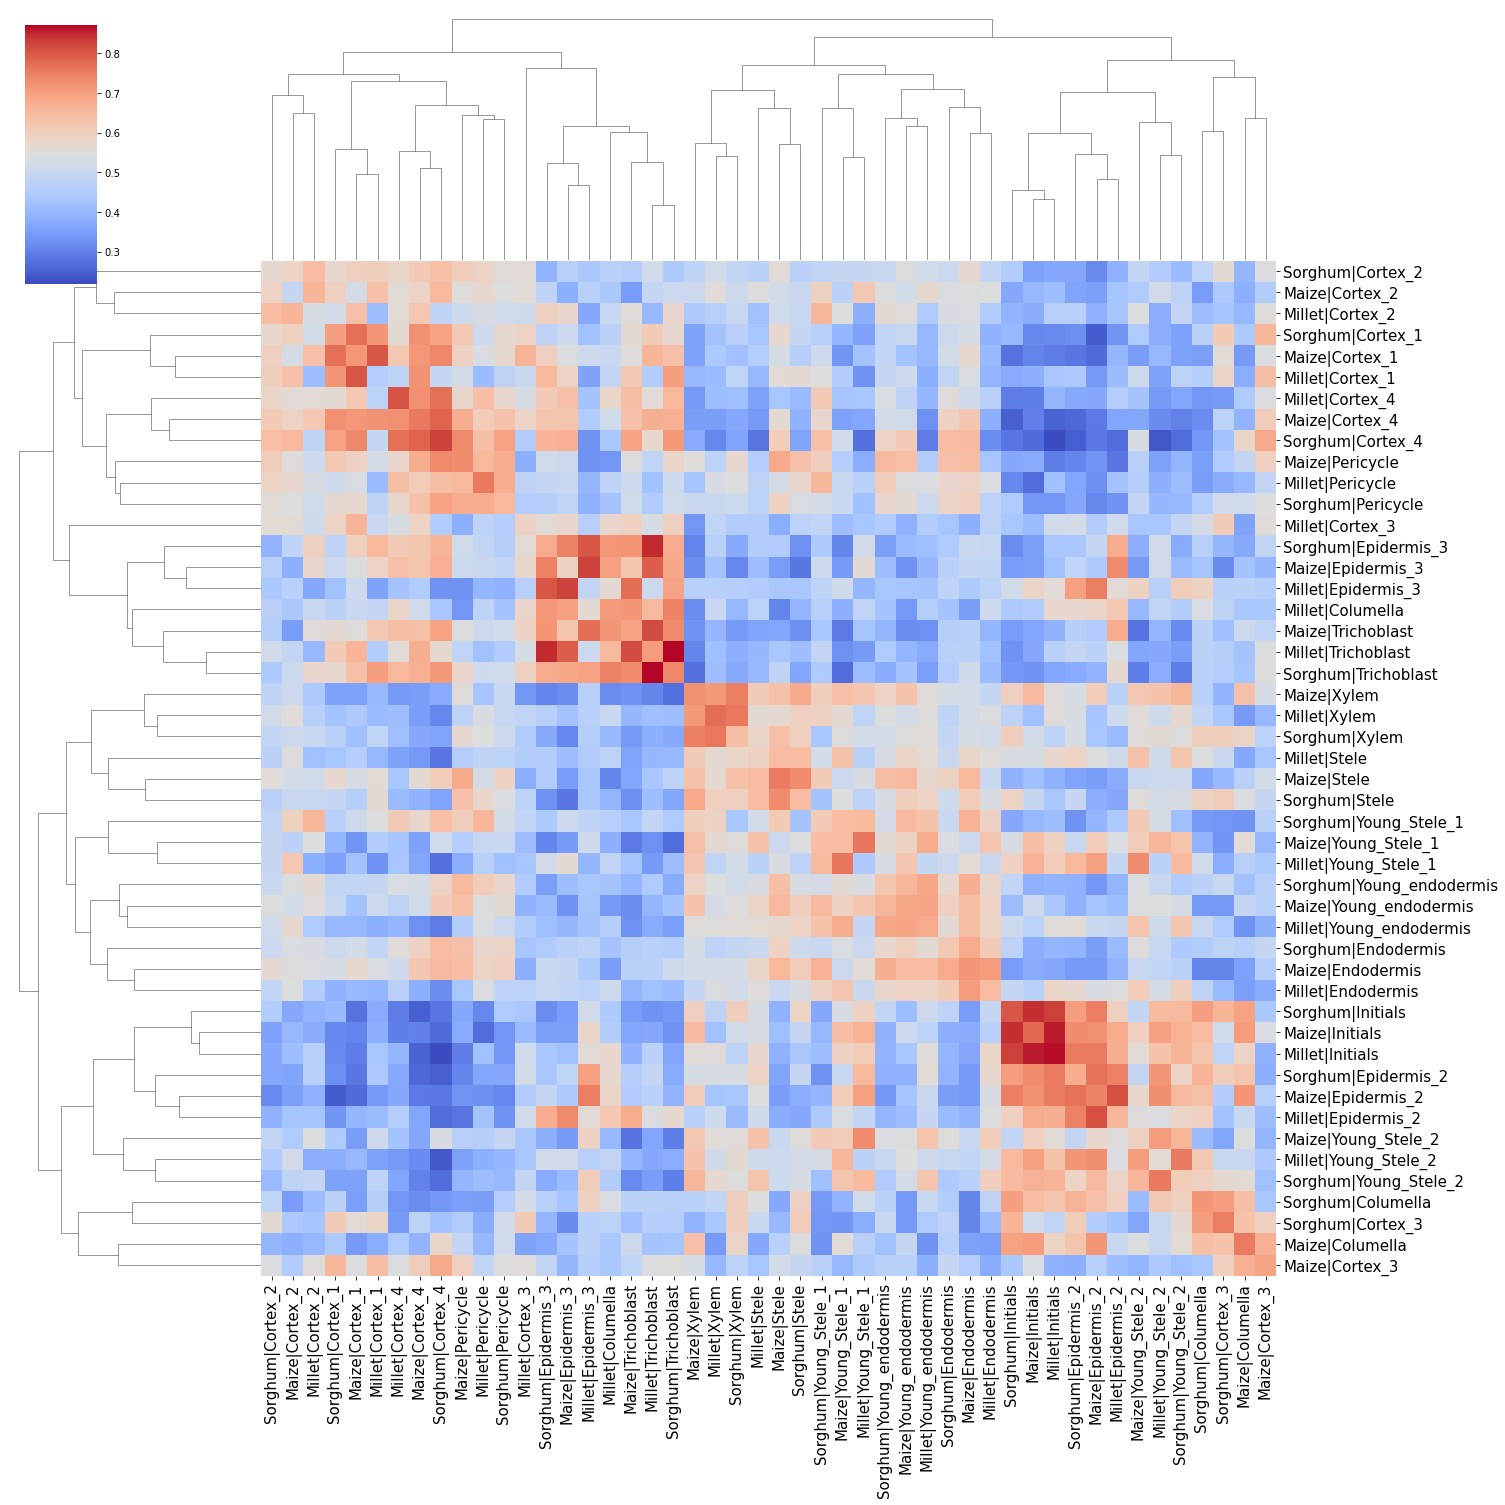

In [15]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

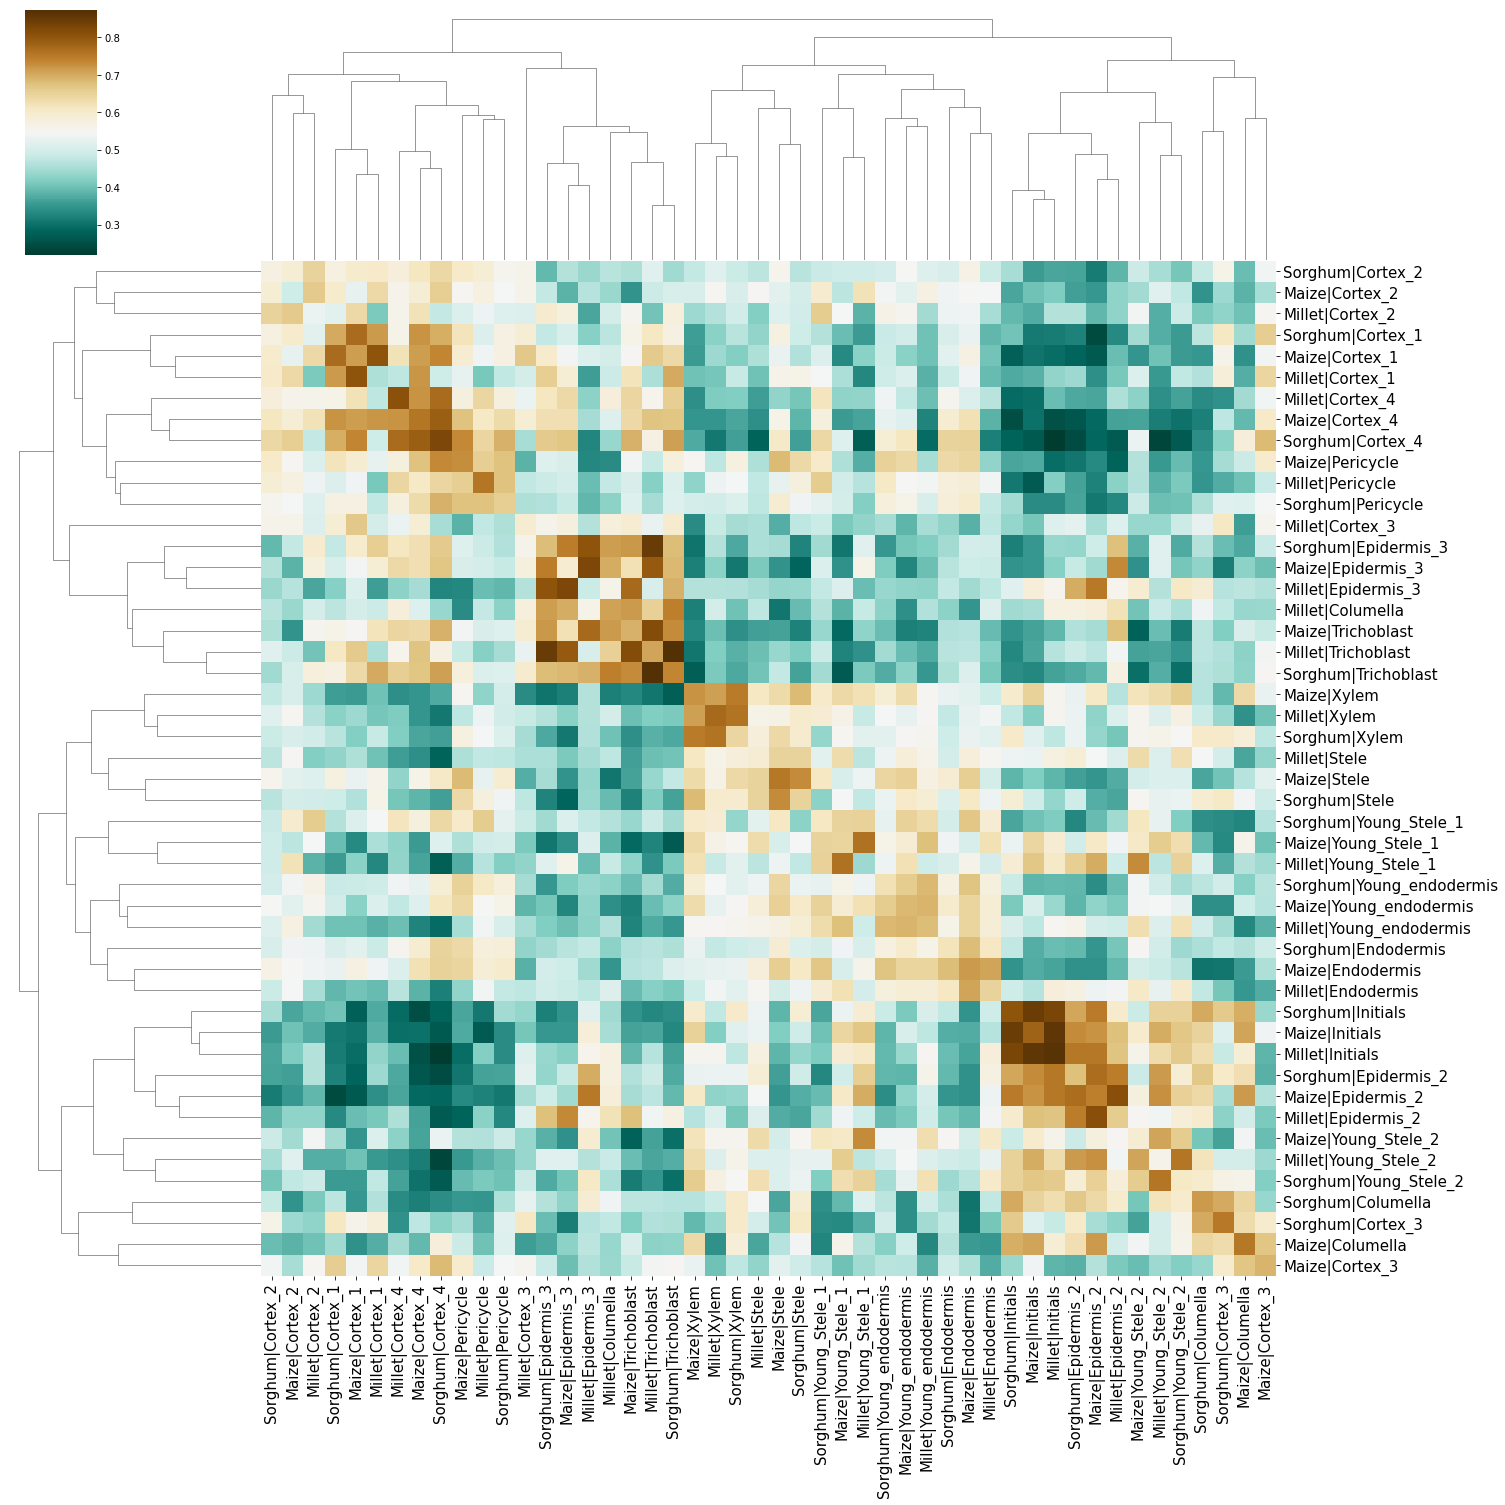

In [16]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/Blue_green_brown_new_data_only_across_species.png', dpi = 1000)

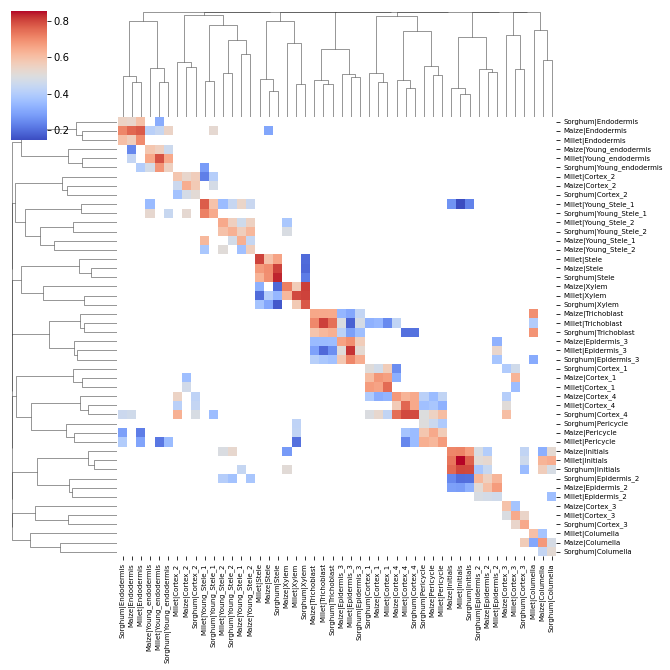

In [17]:

pymn.MetaNeighborUS(norm_data,
                    study_col='Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(norm_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

/home/passala/miniconda3/lib/python3.7/site-packages/pymn/plotting.py:487: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  es = best_hits.lookup(c, r)


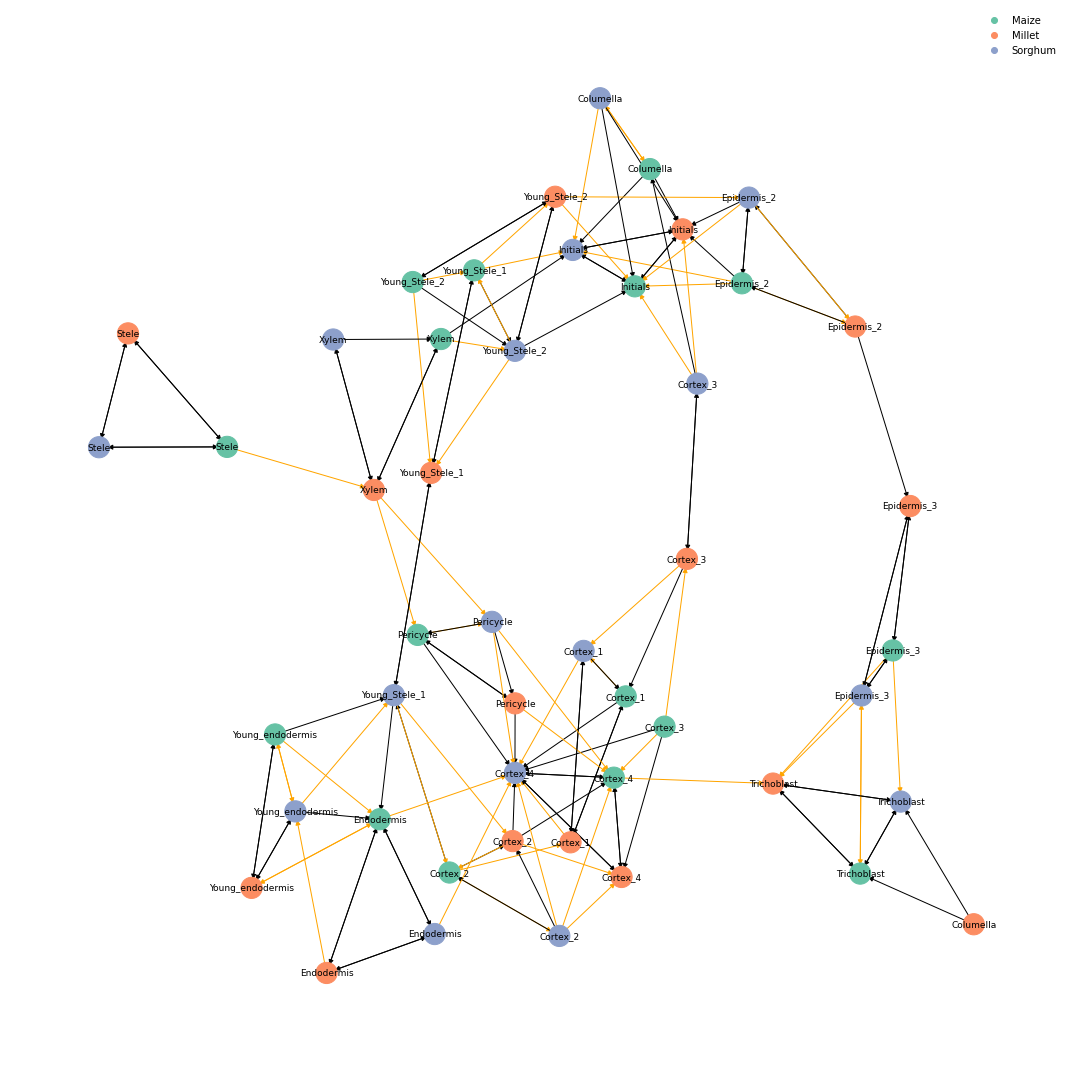

In [18]:
pymn.makeClusterGraph(norm_data,low_threshold= .4)
pymn.plotClusterGraph(norm_data, font_size=9,figsize=(15,15))

In [19]:
merged_tech = norm_data.uns['MetaNeighborUS']

In [20]:
merged_tech.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/merged_technology_type_heatmap.csv')

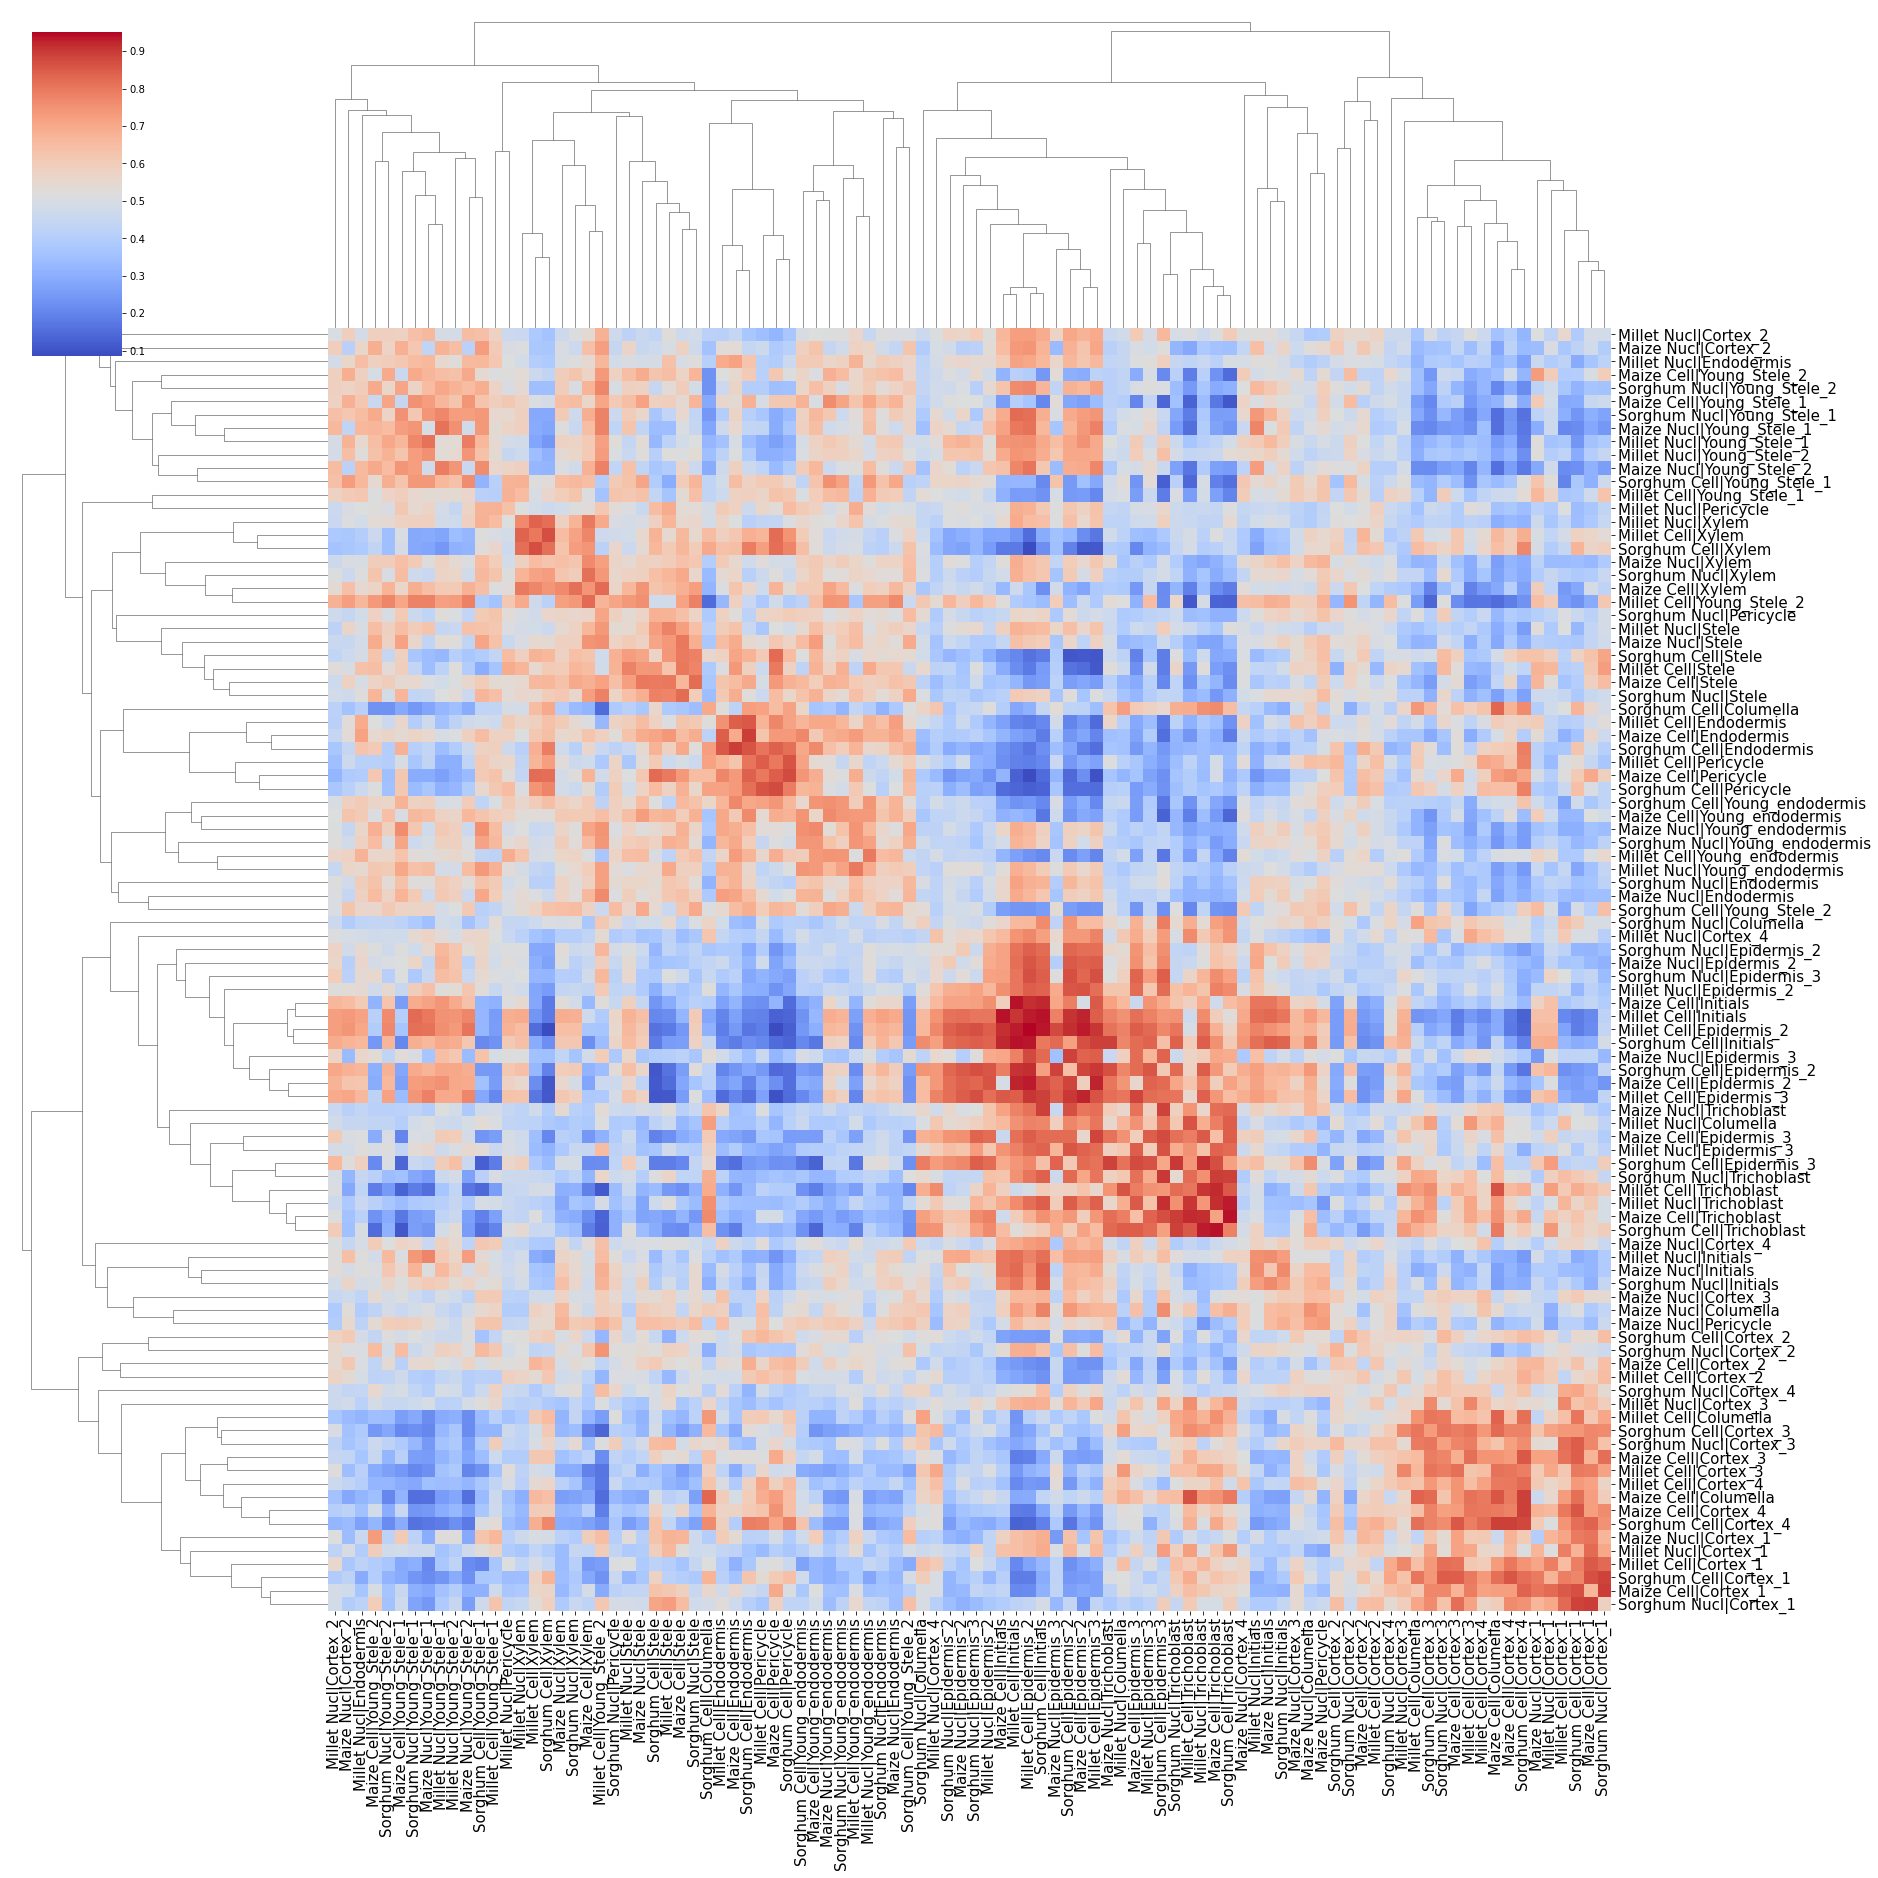

In [21]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_across_species_seperated_by_type.jpg')

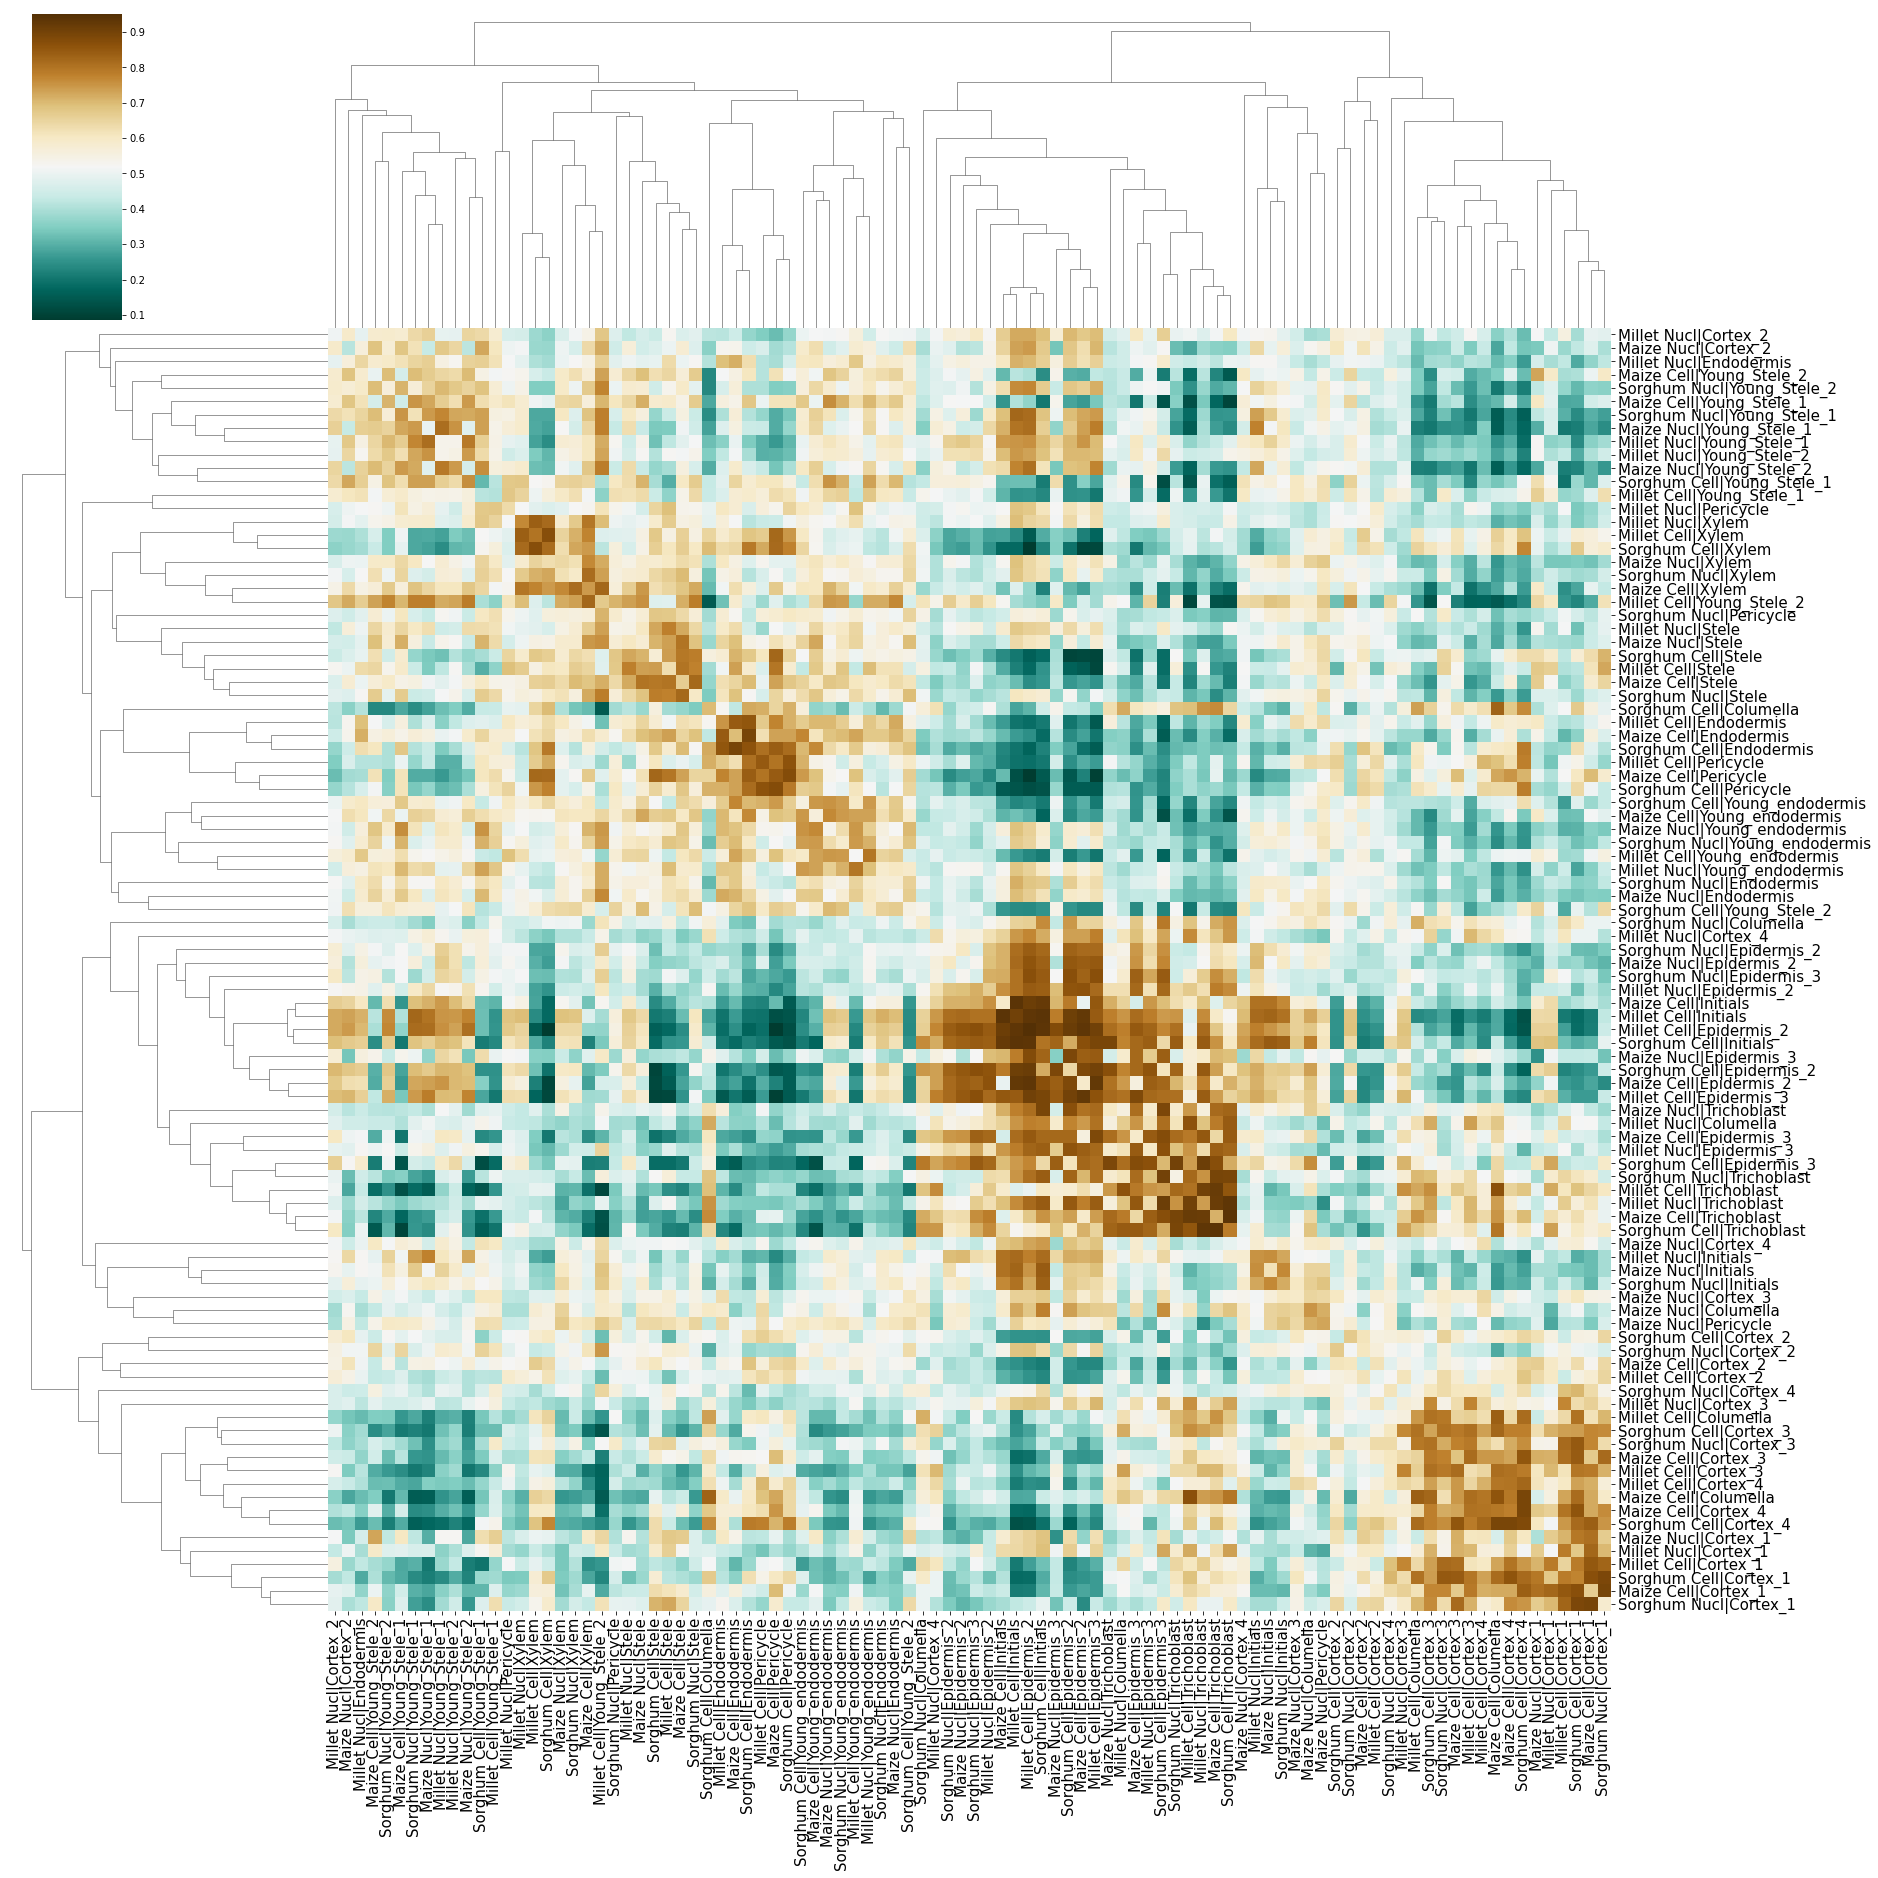

In [22]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/brown_blue_Green_version_all_across_species_seperated_by_type.png',dpi = 1000)
#cbar_pos = (22,5,1,3

In [23]:
seperated_by_cell_type = fully_seperated_data.uns['MetaNeighborUS']
seperated_by_cell_type

,Maize Cell|Columella,Maize Cell|Cortex_1,Maize Cell|Cortex_2,Maize Cell|Cortex_3,Maize Cell|Cortex_4,Maize Cell|Endodermis,Maize Cell|Epidermis_2,Maize Cell|Epidermis_3,Maize Cell|Initials,Maize Cell|Pericycle,...,Sorghum Nucl|Epidermis_2,Sorghum Nucl|Epidermis_3,Sorghum Nucl|Initials,Sorghum Nucl|Pericycle,Sorghum Nucl|Stele,Sorghum Nucl|Trichoblast,Sorghum Nucl|Xylem,Sorghum Nucl|Young_Stele_1,Sorghum Nucl|Young_Stele_2,Sorghum Nucl|Young_endodermis
Maize Cell|Columella,0.858635,0.723901,0.563876,0.747459,0.792916,0.496805,0.465749,0.637448,0.451723,0.725934,...,0.355385,0.456722,0.264416,0.325624,0.264335,0.649086,0.269512,0.154438,0.204109,0.242289
Maize Cell|Cortex_1,0.723901,0.665436,0.530174,0.673129,0.721331,0.559250,0.283853,0.463263,0.439430,0.699132,...,0.317119,0.441765,0.309226,0.418758,0.451230,0.579930,0.394643,0.300037,0.363216,0.352353
Maize Cell|Cortex_2,0.563876,0.530174,0.437636,0.537557,0.591606,0.526443,0.232055,0.281588,0.269375,0.644078,...,0.387114,0.432144,0.385597,0.489920,0.536936,0.388929,0.539849,0.545300,0.538502,0.537229
Maize Cell|Cortex_3,0.747459,0.673129,0.537557,0.686393,0.730495,0.528750,0.255545,0.462624,0.373428,0.695351,...,0.326590,0.436623,0.319178,0.435490,0.424267,0.580460,0.387039,0.258927,0.321620,0.344857
Maize Cell|Cortex_4,0.792916,0.721331,0.591606,0.730495,0.778348,0.570302,0.329295,0.516159,0.407728,0.749947,...,0.300755,0.384721,0.305817,0.395218,0.365017,0.517507,0.326681,0.240074,0.294954,0.312864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sorghum Nucl|Trichoblast,0.649086,0.579930,0.388929,0.580460,0.517507,0.320167,0.705728,0.812611,0.628125,0.365679,...,0.437806,0.446476,0.484383,0.468875,0.430203,0.545385,0.431653,0.279381,0.339784,0.395931
Sorghum Nucl|Xylem,0.269512,0.394643,0.539849,0.387039,0.326681,0.565272,0.492018,0.396894,0.483262,0.521616,...,0.465269,0.400342,0.560684,0.555680,0.556240,0.431653,0.593263,0.472485,0.504264,0.529003
Sorghum Nucl|Young_Stele_1,0.154438,0.300037,0.545300,0.258927,0.240074,0.571807,0.724739,0.506437,0.692516,0.292984,...,0.476422,0.379879,0.581088,0.460768,0.437958,0.279381,0.472485,0.616515,0.568883,0.469485
Sorghum Nucl|Young_Stele_2,0.204109,0.363216,0.538502,0.321620,0.294954,0.566006,0.661861,0.502499,0.629394,0.347784,...,0.471527,0.406864,0.565547,0.501085,0.487116,0.339784,0.504264,0.568883,0.564983,0.504154


In [24]:
seperated_by_cell_type.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/seperated_by_tech_type.csv')

/home/passala/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


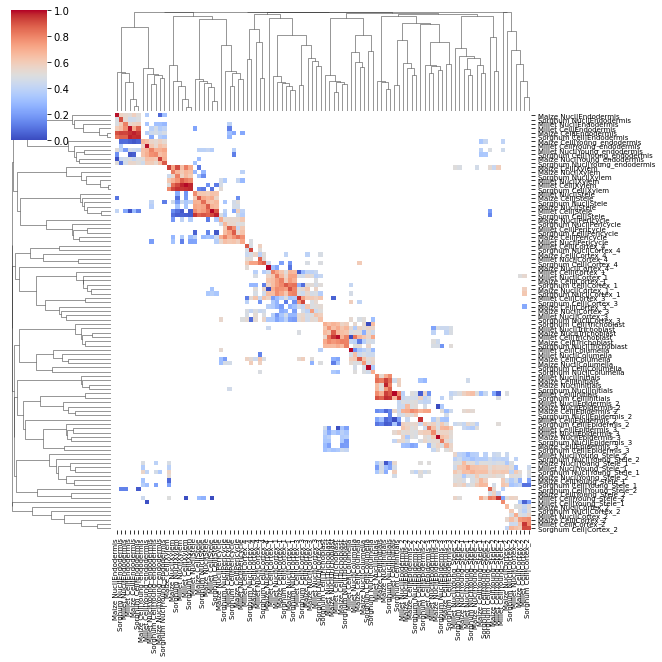

In [25]:
pymn.MetaNeighborUS(fully_seperated_data,
                    study_col='Type and Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(fully_seperated_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

/home/passala/miniconda3/lib/python3.7/site-packages/pymn/plotting.py:487: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  es = best_hits.lookup(c, r)


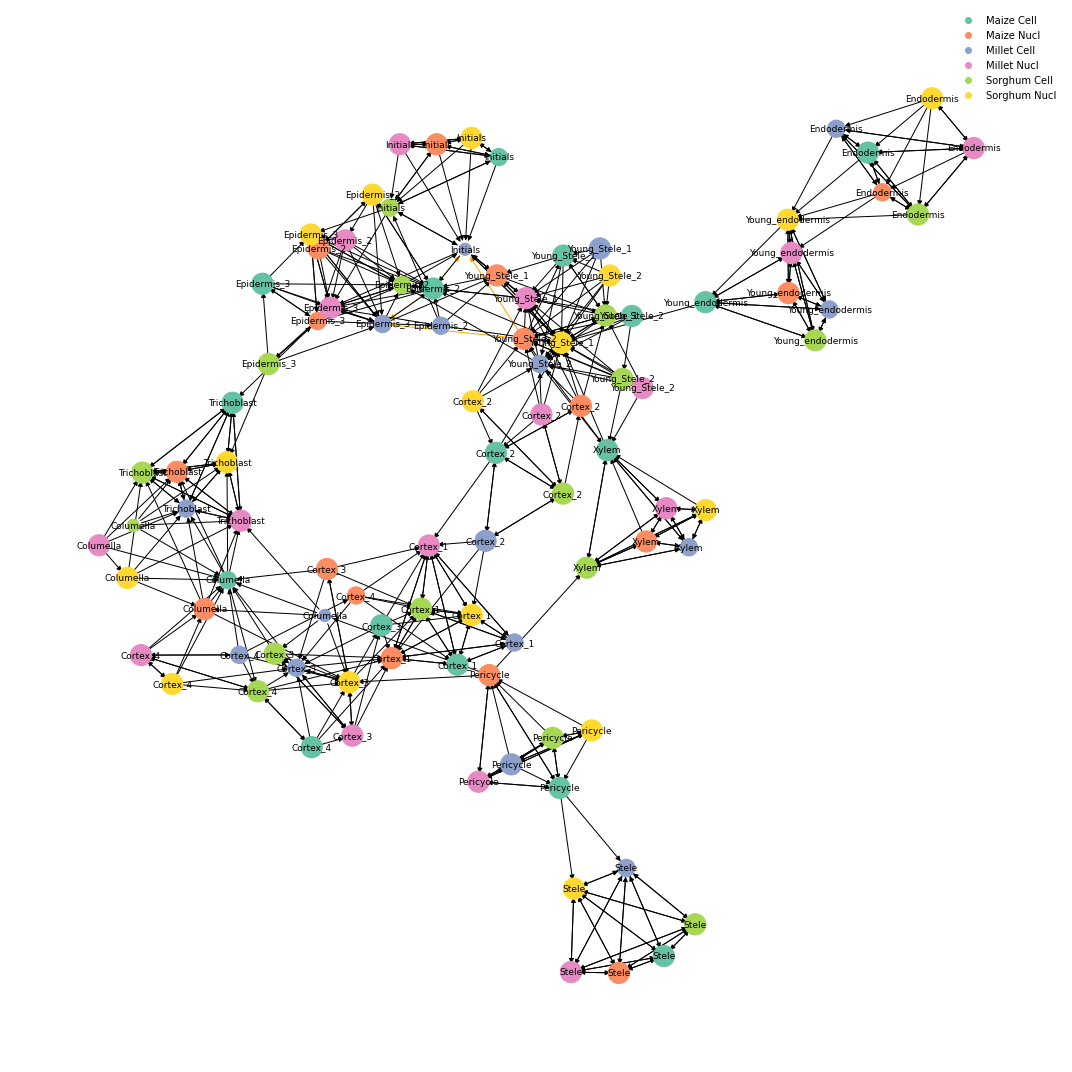

In [26]:
pymn.makeClusterGraph(fully_seperated_data,low_threshold= .5)
pymn.plotClusterGraph(fully_seperated_data, font_size=9,figsize=(15,15))

In [27]:
# list_of_highly_variable_genes = norm_data.var[norm_data.var['highly_variable']==True].index.tolist()
# list_of_highly_variable_genes_pd = pd.DataFrame(index = list_of_highly_variable_genes)
# list_of_highly_variable_genes_pd.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/list_of_highly_variable_genes.csv')